In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 5s 0us/step


In [9]:
# Directory structure
# cats_and_dogs_filtered
# |__ train
#     |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
#     |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
# |__ validation
#     |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
#     |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
# To create more generated training examples
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


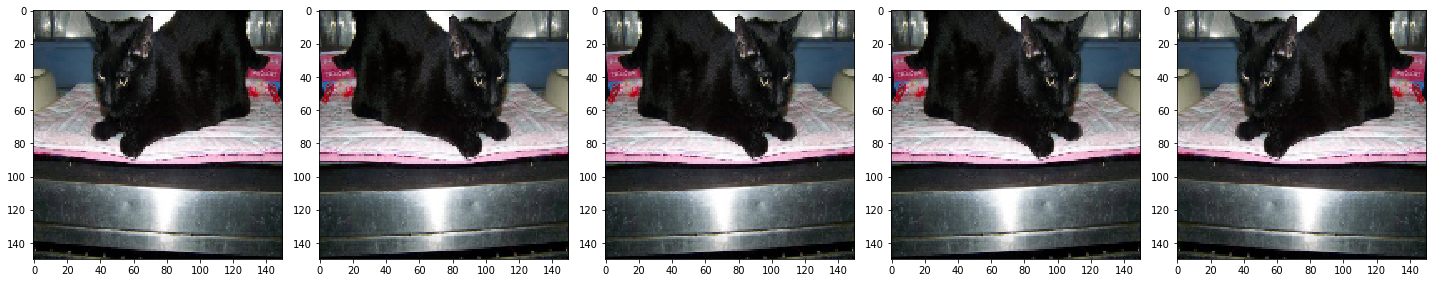

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


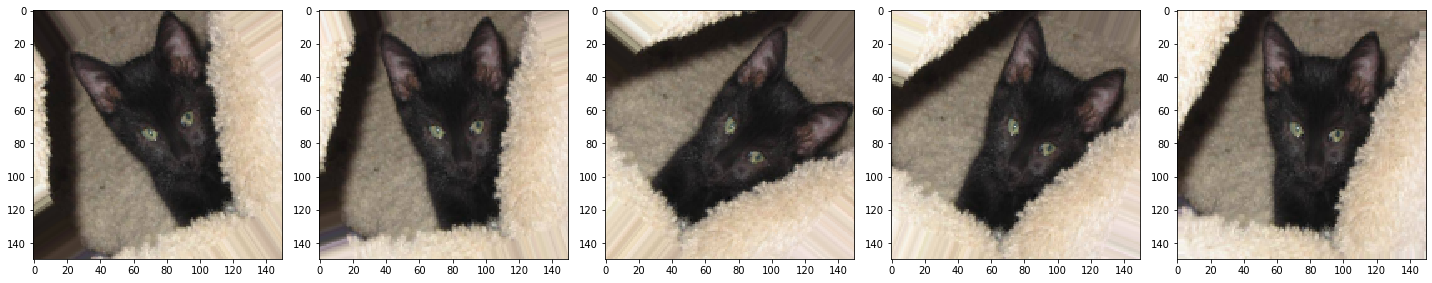

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


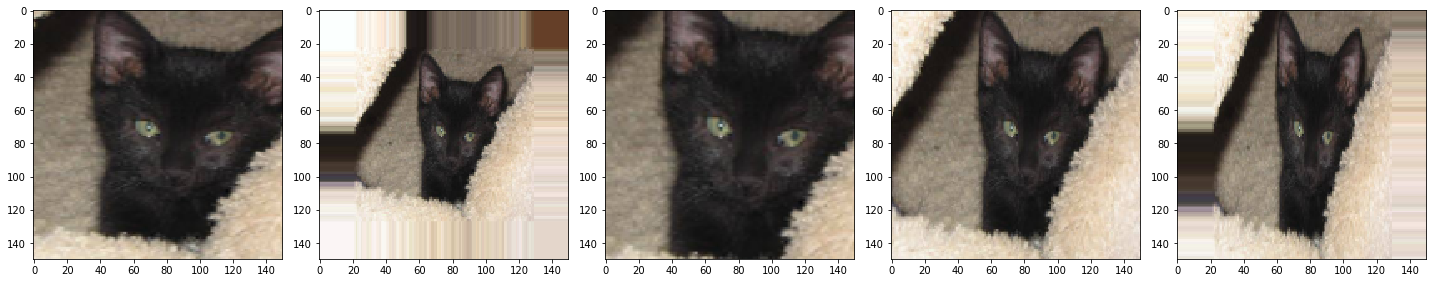

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [22]:
image_gen_val = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [29]:
image_gen_train = keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


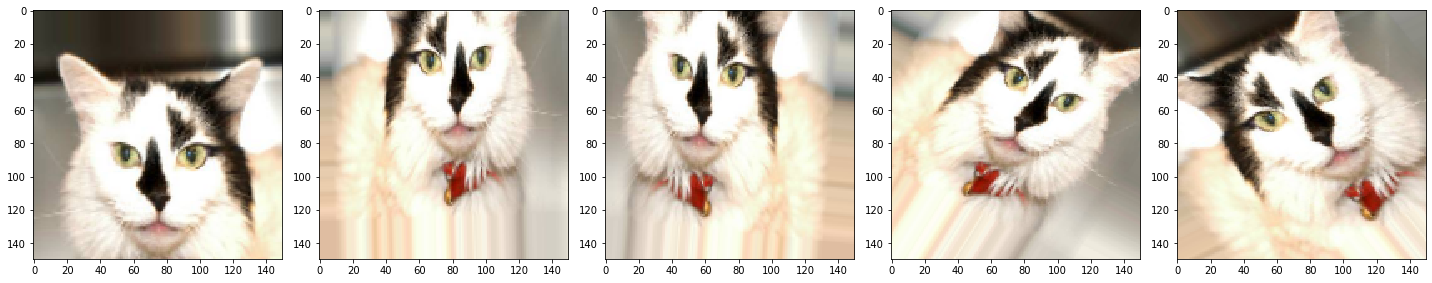

In [32]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [30]:
model = keras.Sequential([
    # Convolution and Pool Layer
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Convolution and Pool Layer
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Convolution and Pool Layer
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Convolution and Pool Layer
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dropout layer
    layers.Dropout(0.5),
    
    # Flatten Layer
    layers.Flatten(),
    
    # Dense Layer
    layers.Dense(512, activation='relu'),
    
    # Dense Layer (output)
    layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [34]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 74s 4s/step - loss: 0.6162 - accuracy: 0.6700 - val_loss: 0.5790 - val_accuracy: 0.7000
Epoch 2/100
20/20 [==============================] - 75s 4s/step - loss: 0.5985 - accuracy: 0.6885 - val_loss: 0.6926 - val_accuracy: 0.6250
Epoch 3/100
20/20 [==============================] - 74s 4s/step - loss: 0.5957 - accuracy: 0.6800 - val_loss: 0.5470 - val_accuracy: 0.7060
Epoch 4/100
20/20 [==============================] - 75s 4s/step - loss: 0.5946 - accuracy: 0.6755 - val_loss: 0.6244 - val_accuracy: 0.6660
Epoch 5/100
20/20 [==============================] - 75s 4s/step - loss: 0.5908 - accuracy: 0.6905 - val_loss: 0.5747 - val_accuracy: 0.6860
Epoch 6/100
20/20 [==============================] - 76s 4s/step - loss: 0.5602 - accuracy: 0.7065 - val_loss: 0.5262 - val_accuracy: 0.7220
Epoch 7/100
20/20 [==============================] - 76s 4s/step - loss: 0.5633 - accuracy: 0.7100 - val_loss: 0.5188 - val_accuracy: 0.7400
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 80s 4s/step - loss: 0.3489 - accuracy: 0.8385 - val_loss: 0.3848 - val_accuracy: 0.8250
Epoch 60/100
20/20 [==============================] - 80s 4s/step - loss: 0.3242 - accuracy: 0.8620 - val_loss: 0.4136 - val_accuracy: 0.8200
Epoch 61/100
20/20 [==============================] - 80s 4s/step - loss: 0.3111 - accuracy: 0.8605 - val_loss: 0.4066 - val_accuracy: 0.8190
Epoch 62/100
20/20 [==============================] - 80s 4s/step - loss: 0.3210 - accuracy: 0.8570 - val_loss: 0.4135 - val_accuracy: 0.8140
Epoch 63/100
20/20 [==============================] - 83s 4s/step - loss: 0.3387 - accuracy: 0.8550 - val_loss: 0.4394 - val_accuracy: 0.8140
Epoch 64/100
20/20 [==============================] - 78s 4s/step - loss: 0.3353 - accuracy: 0.8470 - val_loss: 0.4364 - val_accuracy: 0.8100
Epoch 65/100
20/20 [==============================] - 81s 4s/step - loss: 0.3177 - accuracy: 0.8695 - val_loss: 0.3866 - val_accuracy: 0.8240
Epoch 

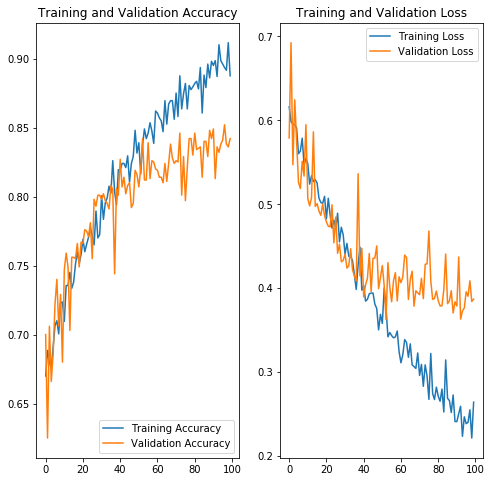

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('models/')